# **EXPLORATORY DATA ANALYSIS ON AIRLINE PASSENGER SATISFACTION DATASET FROM KAGGLE**


# Objective
The objective of this notebook is to perform Exploratory Data Analysis (EDA) on the Airline Passenger Satisfaction dataset to understand the data structure, identify patterns, and determine factors affecting passenger satisfaction.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Loading the Dataset

In [ ]:
df = pd.read_csv('Airline Passenger Satisfaction Dataset Cleaned.csv')
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Dataset Shape

In [ ]:
df.shape

(129880, 24)

# Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

# Missing Values Check

In [ ]:
df.isnull().sum()

,0
id,0
satisfaction_v2,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0


The dataset contains a very small number of missing values (0.3%) in the Arrival Delay in Minutes column. Given the negligible proportion, these missing values are unlikely to significantly affect the analysis.

# Handling Missing and Unnecessary Values

The id column was removed as it serves only as a unique identifier and does not contribute to exploratory analysis or predictive modeling.

In [ ]:
df.drop(columns=['id'], inplace=True)


Rows with missing arrival delay values were removed due to their small proportion relative to the dataset size.

In [ ]:
df = df.dropna(subset=['Arrival Delay in Minutes'])


The Target Variable was renamed for Clean EDA

In [ ]:
df.rename(columns={'satisfaction_v2': 'Satisfaction'}, inplace=True)


# Summary Statistics

In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


The passenger population is predominantly adult, with a wide age range, suggesting diverse travel demographics.

# Target Variable Distribution

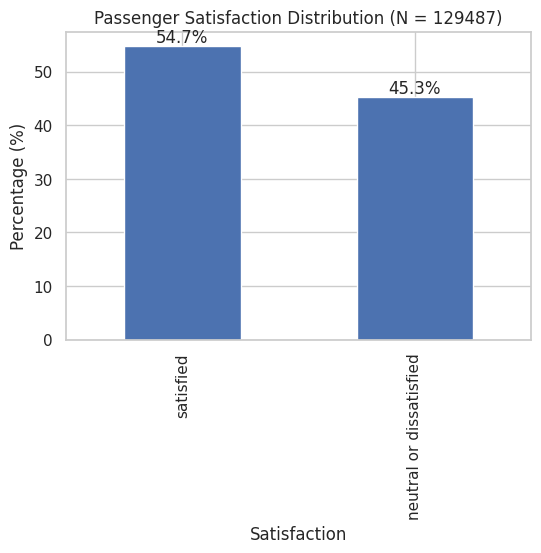

In [ ]:
total_passengers = df.shape[0]
total_passengers

satisfaction_pct = (
    df['Satisfaction']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)

satisfaction_pct

plt.figure(figsize=(6,4))
ax = satisfaction_pct.plot(kind='bar')

plt.ylabel('Percentage (%)')
plt.title(f'Passenger Satisfaction Distribution (N = {total_passengers})')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

This indicates that despite generally moderate service ratings, overall passenger satisfaction remains a challenge and highlights the importance of service quality and operational reliability.

# Gender VS Satisfaction

Total Passengers by Gender:
 Gender
Female    65703
Male      63784
Name: count, dtype: int64


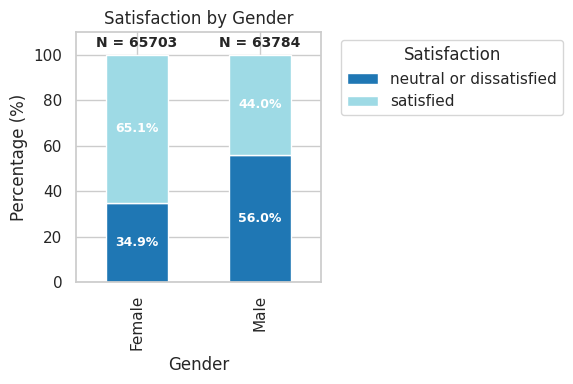

In [ ]:
# Count of males and females
gender_counts = df['Gender'].value_counts()
print("Total Passengers by Gender:\n", gender_counts)

# Percentage table for satisfaction
gender_sat_pct = pd.crosstab(
    df['Gender'],
    df['Satisfaction'],
    normalize='index'
).mul(100).round(2)

# Plot
fig, ax = plt.subplots(figsize=(6,4))
gender_sat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')

plt.ylabel('Percentage (%)')
plt.title('Satisfaction by Gender')

# Move legend outside so it doesn't cover the bars
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels on each bar segment
for i, row in enumerate(gender_sat_pct.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:  # only label non-zero percentages
            ax.text(
                i,
                cum_height + val/2,  # center of segment
                f'{val:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )
        cum_height += val

# Add total count on top of each bar
for i, count in enumerate(gender_counts):
    ax.text(
        i,
        102,  # slightly above 100%
        f'N = {count}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.ylim(0, 110)  # extend y-axis a bit to show N
plt.tight_layout()
plt.show()


Male passengers are less satisfied than female passengers.

Focus on improving services that males care about (like check-in, seats, or food).

Use happy female passengers to promote the airline and loyalty programs.

Adjust services based on travel type or class (business vs. leisure).

Train staff to understand different needs of male and female passengers.

Keep checking satisfaction by gender and collect feedback to make things better.

# Customer Type VS Satisfaction

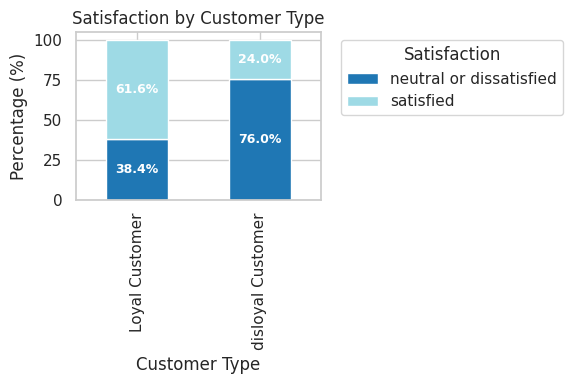

In [ ]:
# Percentage table
cust_sat_pct = pd.crosstab(
    df['Customer Type'],
    df['Satisfaction'],
    normalize='index'
).mul(100).round(2)

# Plot
fig, ax = plt.subplots(figsize=(6,4))
cust_sat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')  # nice colormap

plt.ylabel('Percentage (%)')
plt.title('Satisfaction by Customer Type')

# Move legend outside so it doesn't cover bars
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels on each bar segment
for i, row in enumerate(cust_sat_pct.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:  # avoid labeling 0%
            ax.text(
                i,
                cum_height + val/2,  # place label at center of segment
                f'{val:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )
        cum_height += val

plt.tight_layout()
plt.show()


The analysis shows that loyal customers report significantly higher satisfaction compared to disloyal customers. This is because loyal passengers usually receive better services and benefits such as priority boarding, seat upgrades, and faster customer support, which enhance their travel experience. Frequent travel also builds familiarity and trust with the airline, making their journeys smoother and less stressful. In addition, loyal customers have more realistic expectations and are more tolerant of minor issues.

On the other hand, disloyal customers often base their opinions on a single negative experience, do not receive special perks, and are usually more price-sensitive. They tend to compare airlines more critically and are less emotionally connected to the brand, which makes them less forgiving of service problems. As a result, disloyal customers are more likely to report dissatisfaction, while loyal customers maintain higher satisfaction due to positive past experiences and ongoing benefits.

# Type of Travel VS Satisfaction

Total Passengers by Type of Travel:
 Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64


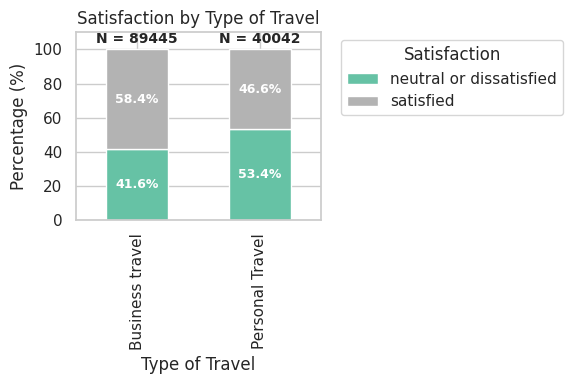

In [ ]:
# Total passengers by Type of Travel
travel_counts = df['Type of Travel'].value_counts()
print("Total Passengers by Type of Travel:\n", travel_counts)

# Percentage table
travel_sat_pct = pd.crosstab(
    df['Type of Travel'],
    df['Satisfaction'],
    normalize='index'
).mul(100).round(2)

# Plot
fig, ax = plt.subplots(figsize=(6,4))
travel_sat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

plt.ylabel('Percentage (%)')
plt.title('Satisfaction by Type of Travel')

# Move legend outside
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels on each bar segment
for i, row in enumerate(travel_sat_pct.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:  # label only non-zero percentages
            ax.text(
                i,
                cum_height + val/2,  # center of segment
                f'{val:.1f}%',
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                fontweight='bold'
            )
        cum_height += val

# Add total count on top of each bar
for i, count in enumerate(travel_counts):
    ax.text(
        i,
        102,  # slightly above 100%
        f'N = {count}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.ylim(0, 110)  # extend y-axis to show N
plt.tight_layout()
plt.show()


The analysis shows that business and personal travelers have different travel experiences and expectations.

Business travelers mostly fly in Business Class, where they receive premium services such as better seating, food, and personalized care, which naturally increases their satisfaction. They are usually loyal customers with elite status, giving them extra perks like priority boarding and lounge access, and they are familiar with airline systems, making their journeys smoother. Since their travel is often company-paid, they are less sensitive to ticket prices and extra costs. Business travelers mainly value efficiency, such as working WiFi, fast check-in, and on-time performance.

In contrast, personal travelers mostly fly Economy, pay out-of-pocket, and focus more on comfort, entertainment, and overall experience, making them more sensitive to small problems and costs, which can reduce their satisfaction.

# Airline Seating Class vs Satisfaction

Total Passengers by Class:
 Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64


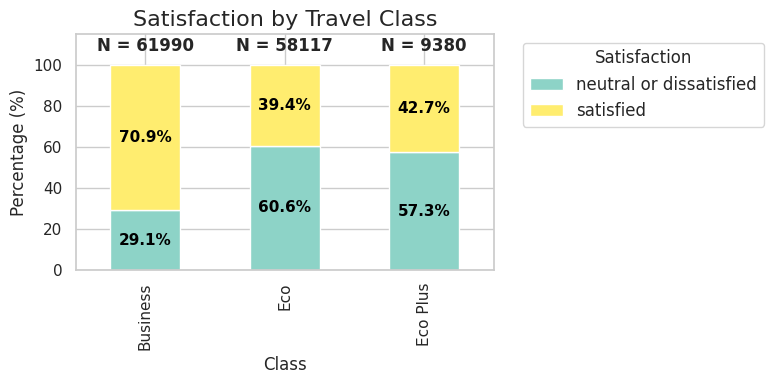

In [ ]:
# Total passengers by Class
class_counts = df['Class'].value_counts()
print("Total Passengers by Class:\n", class_counts)

# Percentage table
class_sat_pct = pd.crosstab(
    df['Class'],
    df['Satisfaction'],
    normalize='index'
).mul(100).round(2)

# Bigger Plot
fig, ax = plt.subplots(figsize=(8,4))  # increased width and height
class_sat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

plt.ylabel('Percentage (%)')
plt.title('Satisfaction by Travel Class', fontsize=16)

# Move legend outside
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Add percentage labels inside each segment
for i, row in enumerate(class_sat_pct.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(
                i,
                cum_height + val/2,
                f'{val:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=11,
                fontweight='bold'
            )
        cum_height += val

# Add total count on top of each bar
for i, count in enumerate(class_counts):
    ax.text(
        i,
        105,  # slightly above 100%
        f'N = {count}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(0, 115)  # extend y-axis to show totals
plt.tight_layout()
plt.show()


The analysis shows a strong relationship between travel class and customer satisfaction. Business class customers report significantly higher satisfaction (70.9%) compared to Economy (39.4%) and Eco Plus (42.7%). This suggests that premium services are effective, while the Economy and Eco Plus experiences represent major improvement opportunities. Given the large volume of Economy passengers, targeted improvements in this segment could yield substantial gains in overall satisfaction and customer retention.

# Age Distribution and Age Group Analysis

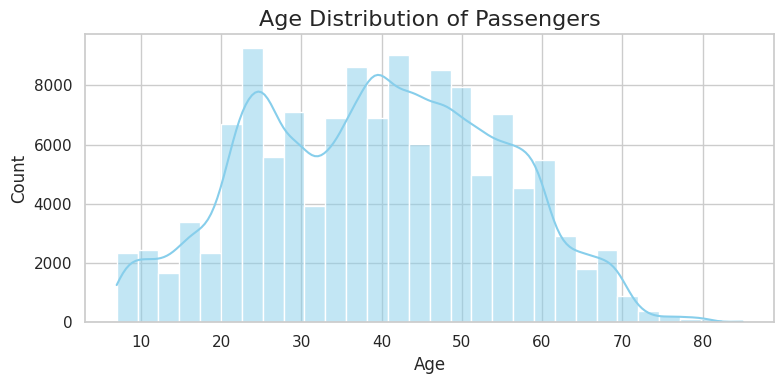

Total passengers by Age Group:
 AgeGroup
Teen           11032
Young Adult    29722
Adult          41365
Middle Age     37351
Senior         10017
Name: count, dtype: int64


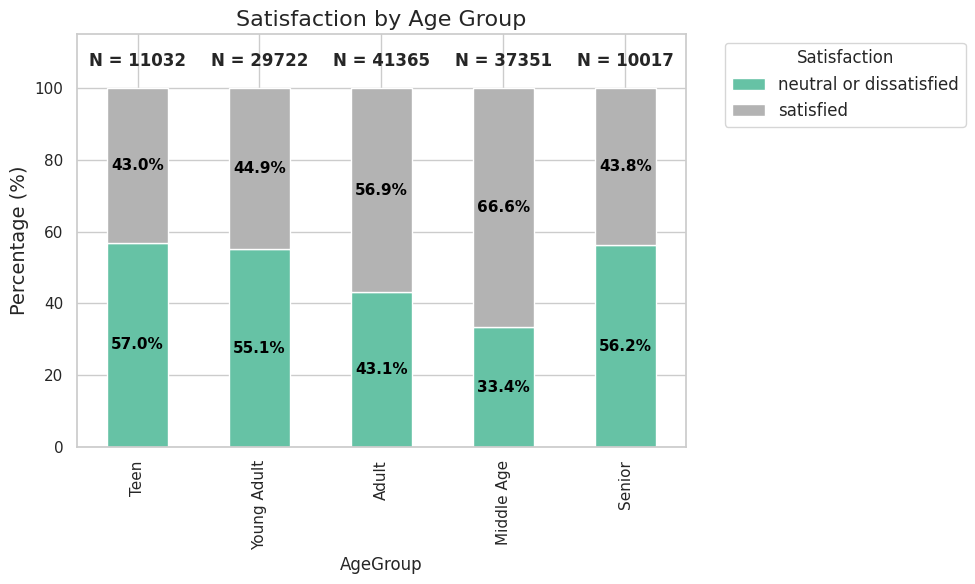

In [ ]:
# 1. Age Distribution Histogram
plt.figure(figsize=(8,4))  # bigger figure
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Create Age Groups
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 18, 30, 45, 60, 100],
    labels=['Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
)

# 3. Total passengers per age group
age_counts = df['AgeGroup'].value_counts().sort_index()
print("Total passengers by Age Group:\n", age_counts)

# 4. Percentage table for Satisfaction by AgeGroup
age_sat_pct = pd.crosstab(
    df['AgeGroup'],
    df['Satisfaction'],
    normalize='index'
).mul(100).round(2)

# 5. Stacked bar plot
fig, ax = plt.subplots(figsize=(10,6))  # bigger figure for clarity
age_sat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

plt.ylabel('Percentage (%)', fontsize=14)
plt.title('Satisfaction by Age Group', fontsize=16)

# Move legend outside
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Add percentage labels inside bars
for i, row in enumerate(age_sat_pct.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(
                i,
                cum_height + val/2,
                f'{val:.1f}%',
                ha='center',
                va='center',
                color='black',
                fontsize=11,
                fontweight='bold'
            )
        cum_height += val

# Add total passengers on top
for i, count in enumerate(age_counts):
    ax.text(
        i,
        105,  # above 100%
        f'N = {count}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(0, 115)  # extend y-axis
plt.tight_layout()
plt.show()


Customer satisfaction varies strongly by age. Middle-aged passengers show the highest satisfaction (66.6%), while teens, young adults, and seniors report significantly lower satisfaction. This suggests that current airline services are best aligned with the needs of working-age adults, while younger and older customers represent key improvement opportunities.

1. ***Redesign experience for seniors:***


* Assisted boarding & baggage

* Clear communication & human support

* Comfortable seating & reduced walking distances

This can significantly raise satisfaction for a growing demographic.

2. ***Modernize the experience for younger passengers:***

* In-flight WiFi & entertainment

* Mobile app & digital journey

# Flight Distance VS Satisfaction

/tmp/ipython-input-1342754395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


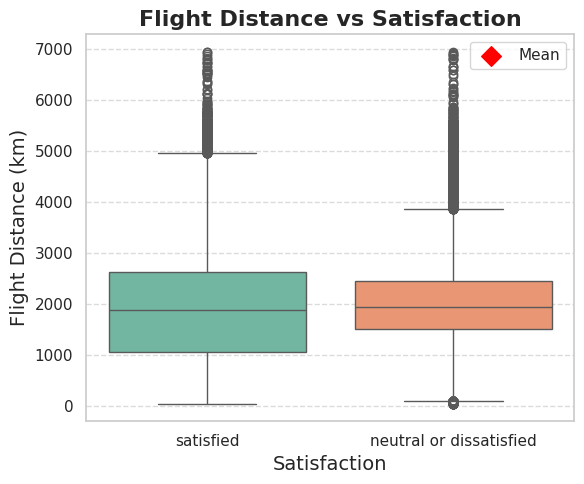

In [ ]:
plt.figure(figsize=(6,5))  # bigger figure
sns.boxplot(
    x='Satisfaction',
    y='Flight Distance',
    data=df,
    palette='Set2',
    showfliers=True  # you can set False to hide extreme outliers
)

plt.title('Flight Distance vs Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Flight Distance (km)', fontsize=14)

# Add mean points for extra info
means = df.groupby('Satisfaction')['Flight Distance'].mean().values
for i, mean in enumerate(means):
    plt.scatter(i, mean, color='red', marker='D', s=100, label='Mean' if i==0 else "")

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)  # horizontal gridlines for readability
plt.tight_layout()
plt.show()


The box plot shows that flight distance is similar for both satisfied and dissatisfied passengers.
Although dissatisfied passengers have a slightly higher average distance, the overlap is large.
This means flight distance alone does not strongly affect satisfaction.

--- Satisfied Outliers Class % ---
Class
Business    92.823894
Eco          5.546936
Eco Plus     1.629170
Name: proportion, dtype: float64

--- Neutral/Dissatisfied Outliers Class % ---
Class
Business    74.450194
Eco         20.827943
Eco Plus     4.721863
Name: proportion, dtype: float64


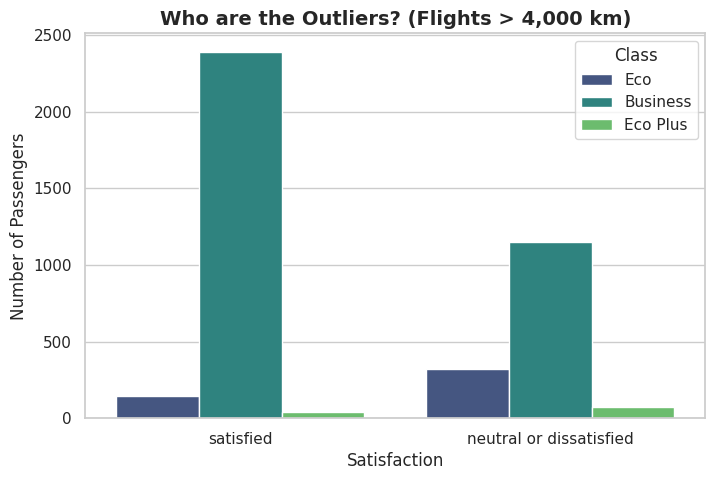

In [ ]:
# 1. Create a dataframe of just the 'outliers' (flights > 4000 km)
outliers_df = df[df['Flight Distance'] > 4000]

# 2. Compare the Class distribution for each satisfaction group
print("--- Satisfied Outliers Class % ---")
print(outliers_df[outliers_df['Satisfaction'] == 'satisfied']['Class'].value_counts(normalize=True) * 100)

print("\n--- Neutral/Dissatisfied Outliers Class % ---")
print(outliers_df[outliers_df['Satisfaction'] != 'satisfied']['Class'].value_counts(normalize=True) * 100)

# 3. Visualize the difference
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=outliers_df, x='Satisfaction', hue='Class', palette='viridis')
plt.title('Who are the Outliers? (Flights > 4,000 km)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Passengers')
plt.show()

Satisfied Long-Haul: 93% Business Class. (Product-Market Fit is strong).

Dissatisfied Long-Haul: 25% are Economy/Eco Plus. (Physical endurance limit reached).

Critical Risk: 74% of dissatisfied long-haulers are Business Class. (Service reliability issues).

# Service Quality Comparison by Satisfaction

In [ ]:
service_cols = [
    'Seat comfort','Food and drink','Inflight wifi service',
    'Inflight entertainment','Online support',
    'Ease of Online booking','On-board service',
    'Leg room service','Baggage handling',
    'Checkin service','Cleanliness','Online boarding'
]

df.groupby('Satisfaction')[service_cols].mean()


,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
Satisfaction,,,,,,,,,,,,
neutral or dissatisfied,2.467315,2.660609,2.919922,2.609044,2.959833,2.851873,2.972818,3.052555,3.364269,2.971845,3.377203,2.869653
satisfied,3.145552,3.010285,3.521374,4.024266,3.983085,3.985031,3.872196,3.844587,3.969287,3.645721,3.977639,3.751799


**Insight:**
Satisfied passengers consistently give higher ratings across all service features.

# Correlation Between Service Ratings

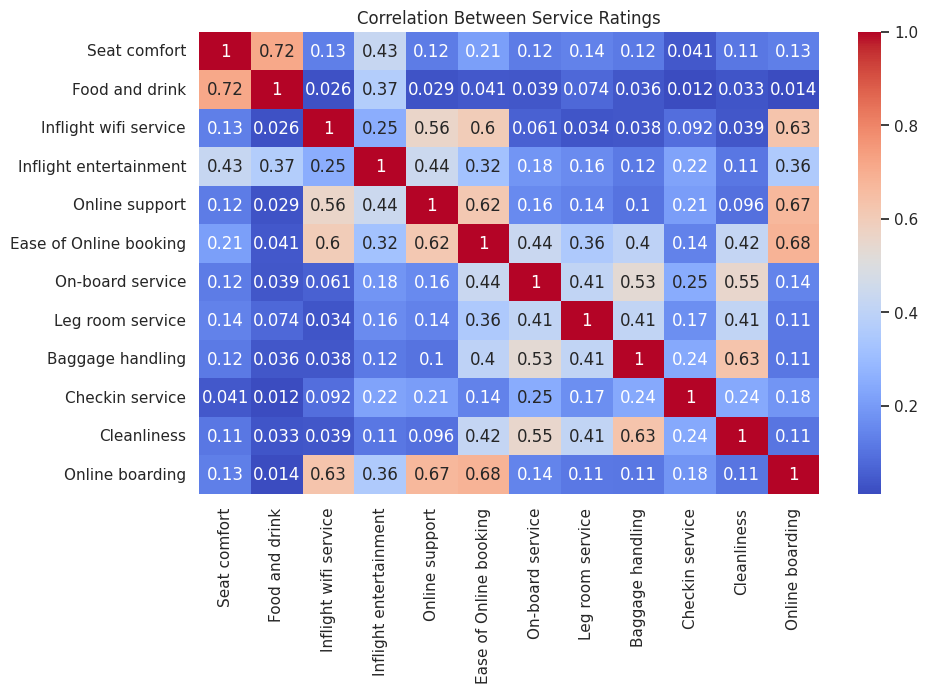

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[service_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Service Ratings')
plt.show()


##  Important relationships

####  **Strong correlations**

These services usually get **similar ratings together**:

* **Seat comfort & Food and drink → 0.72**
  
  If seat comfort is good, food rating is also likely good.

* **Online support & Online boarding → 0.67**

* **Ease of online booking & Online boarding → 0.68**

* **Inflight wifi & Online boarding → 0.63**

* **Cleanliness & Baggage handling → 0.63**

 Means passengers judge **related services similarly**.



### **Moderate correlations**

* **Inflight entertainment & Online support → 0.44**
* **On-board service & Cleanliness → 0.55**
* **Leg room & Baggage handling → 0.41**

 Some connection, but not very strong.


###  **Weak correlations**

* **Food & wifi → 0.026**
* **Seat comfort & check-in → 0.041**
* **Wifi & baggage → 0.038**

 These services are **mostly independent**.


### **Final interpretation**

> The heatmap shows strong positive correlations among digital services such as online booking, online support, and online boarding.

> Physical comfort features like seat comfort and food also show a strong relationship.

> This indicates that passengers tend to rate related services Consistently.

> Overall, service quality dimensions are interconnected, reflecting a unified passenger experience.

### **Main point**

**Good service in one area often means good service in related areas**



# Flight Delays vs Satisfaction

/tmp/ipython-input-4061461630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


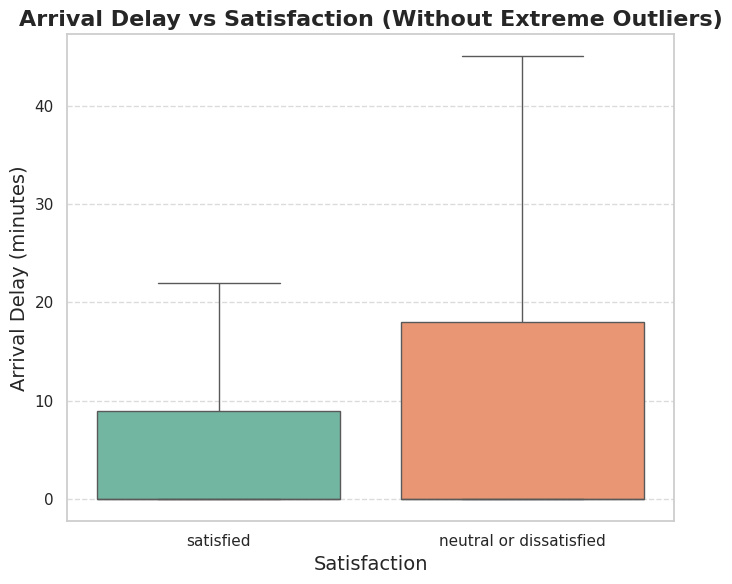

Total passengers by Delay >30 min:
 Delayed_30min
False    111112
True      18375
Name: count, dtype: int64


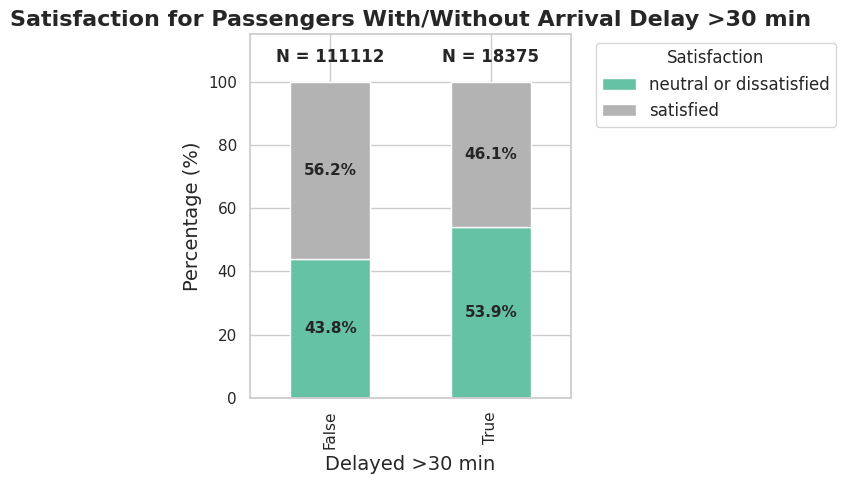

In [ ]:
# 1. Boxplot for Arrival Delay
plt.figure(figsize=(7,6))
sns.boxplot(
    x='Satisfaction',
    y='Arrival Delay in Minutes',
    data=df,
    palette='Set2',
    showfliers=False  # hide extreme outliers to make it readable
)
plt.title('Arrival Delay vs Satisfaction (Without Extreme Outliers)', fontsize=16, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Arrival Delay (minutes)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Create delayed flag for >30 min
df['Delayed_30min'] = df['Arrival Delay in Minutes'] > 30

# Total counts
delay_counts = df['Delayed_30min'].value_counts()
print("Total passengers by Delay >30 min:\n", delay_counts)

# 3. Percentage table for satisfaction among delayed/not delayed
delay_sat_pct = pd.crosstab(
    df['Delayed_30min'],
    df['Satisfaction'],
    normalize='index'
).mul(100).round(2)

# 4. Stacked bar plot for clarity
fig, ax = plt.subplots(figsize=(7,5))
delay_sat_pct.plot(kind='bar', stacked=True, ax=ax, colormap='Set2')

plt.title('Satisfaction for Passengers With/Without Arrival Delay >30 min', fontsize=16, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=14)
plt.xlabel('Delayed >30 min', fontsize=14)

# Legend outside
ax.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Add percentages inside bars
for i, row in enumerate(delay_sat_pct.values):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(
                i,
                cum_height + val/2,
                f'{val:.1f}%',
                ha='center',
                va='center',
                fontsize=11,
                fontweight='bold'
            )
        cum_height += val

# Add total passengers on top
for i, count in enumerate(delay_counts):
    ax.text(
        i,
        105,  # slightly above 100%
        f'N = {count}',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

plt.ylim(0,115)
plt.tight_layout()
plt.show()


These diagrams show that neutral or dissatisfied passengers experience significantly longer arrival delays than satisfied passengers. The median delay for dissatisfied passengers is approximately 10–12 minutes, which is more than double the delay experienced by satisfied passengers (3–5 minutes). Additionally, the dissatisfied group shows greater variation, with delays reaching up to 45 minutes. This clearly indicates that longer and unpredictable delays strongly reduce passenger satisfaction. Therefore, airlines should prioritize improving on-time performance and operational reliability. Providing timely updates and compensation during delays can also help improve customer experience and satisfaction.


# **XGBOOST IMPLEMENTATION AND SHAP EXPLAINABILITY ON AIRLINE PASSENGER SATISFACTION DATASET FROM KAGGLE**


# Objective

To build an XGBoost classification model that predicts airline passenger satisfaction based on demographic, travel, service quality, and delay-related features.

### Model Training

In [ ]:
# Make ML copy
df_ml = df.copy()

# Drop EDA-only column
df_ml = df_ml.drop(columns=['AgeGroup'], errors='ignore')

# Encode target variable
df_ml['Satisfaction'] = df_ml['Satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

# One-hot encode categorical features
categorical_cols = [
    'Gender', 'Customer Type', 'Type of Travel', 'Class'
]

df_ml = pd.get_dummies(
    df_ml,
    columns=categorical_cols,
    drop_first=True
)

# Define X and y
X = df_ml.drop('Satisfaction', axis=1)
y = df_ml['Satisfaction']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train XGBoost model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### Model Evaluation

XGBoost Accuracy: 0.9576
Classification Report:

                        precision    recall  f1-score   support

Neutral / Dissatisfied       0.95      0.96      0.95     11721
             Satisfied       0.97      0.95      0.96     14177

              accuracy                           0.96     25898
             macro avg       0.96      0.96      0.96     25898
          weighted avg       0.96      0.96      0.96     25898



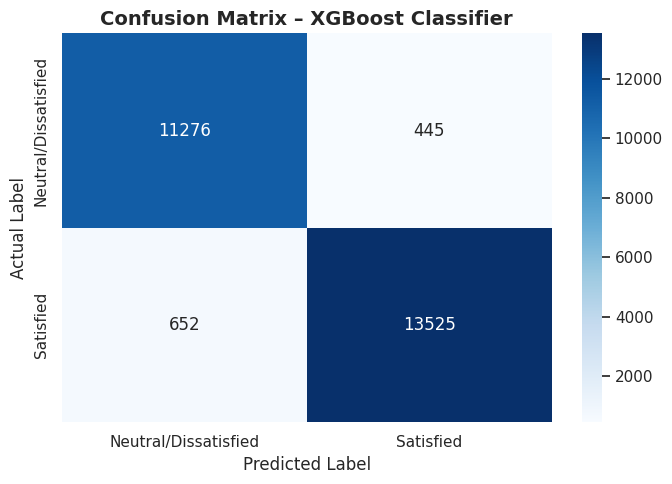

In [ ]:
# accuracy
from sklearn.metrics import accuracy_score

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {accuracy:.4f}")

from sklearn.metrics import classification_report

# classification report
print("Classification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=['Neutral / Dissatisfied', 'Satisfied']
))

# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
    yticklabels=['Neutral/Dissatisfied', 'Satisfied']
)

plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.title('Confusion Matrix – XGBoost Classifier', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



## **SHAP Explainability**

In [ ]:
!pip install shap

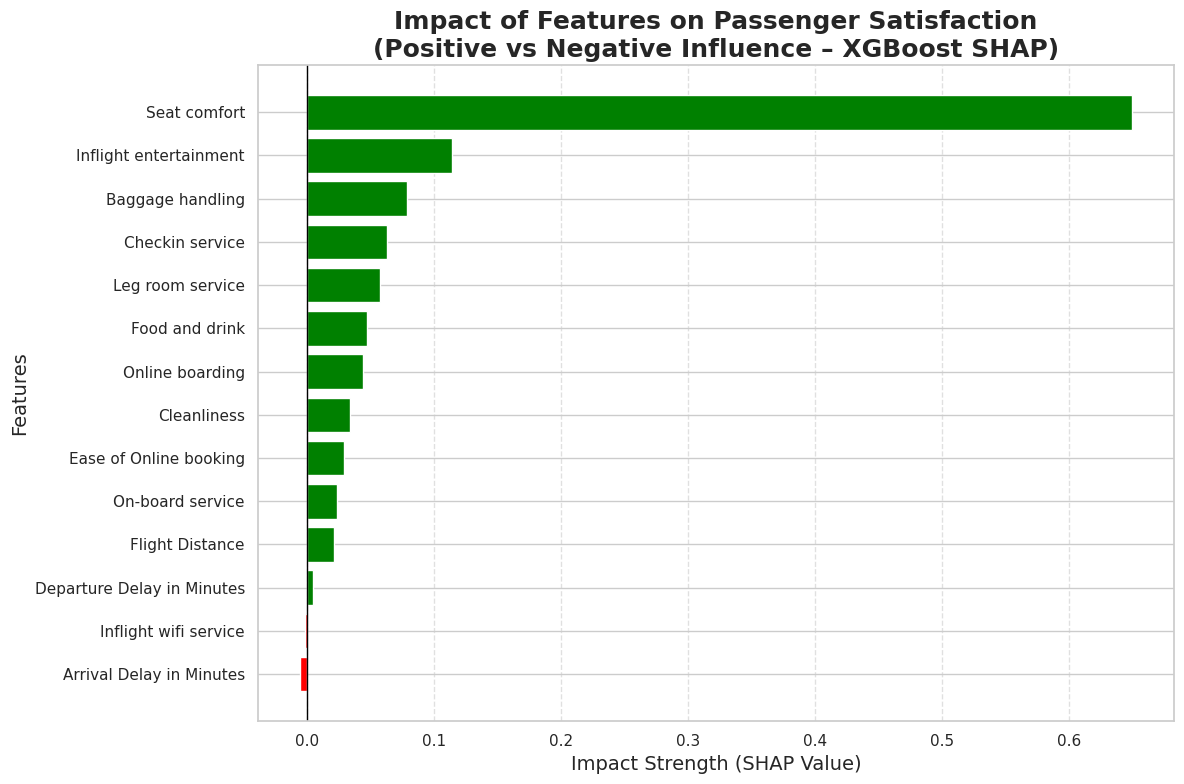

In [ ]:
impact_features = [
    'Seat comfort', 'Inflight entertainment', 'Cleanliness',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Online boarding', 'Inflight wifi service',
    'Ease of Online booking', 'Food and drink',
    'Flight Distance',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Convert SHAP to DataFrame
shap_df = pd.DataFrame(
    shap_values,
    columns=X_test.columns
)

# Filter only required impact features
shap_impact = shap_df[impact_features]

# Mean SHAP per feature (direction matters)
mean_shap = shap_impact.mean().sort_values()

# plotting
plt.figure(figsize=(12,8))

colors = mean_shap.apply(lambda x: 'green' if x > 0 else 'red')

plt.barh(
    mean_shap.index,
    mean_shap.values,
    color=colors
)

plt.axvline(0, color='black', linewidth=1)

plt.title(
    'Impact of Features on Passenger Satisfaction\n'
    '(Positive vs Negative Influence – XGBoost SHAP)',
    fontsize=18,
    fontweight='bold'
)

plt.xlabel('Impact Strength (SHAP Value)', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()





## **Correlation plot**

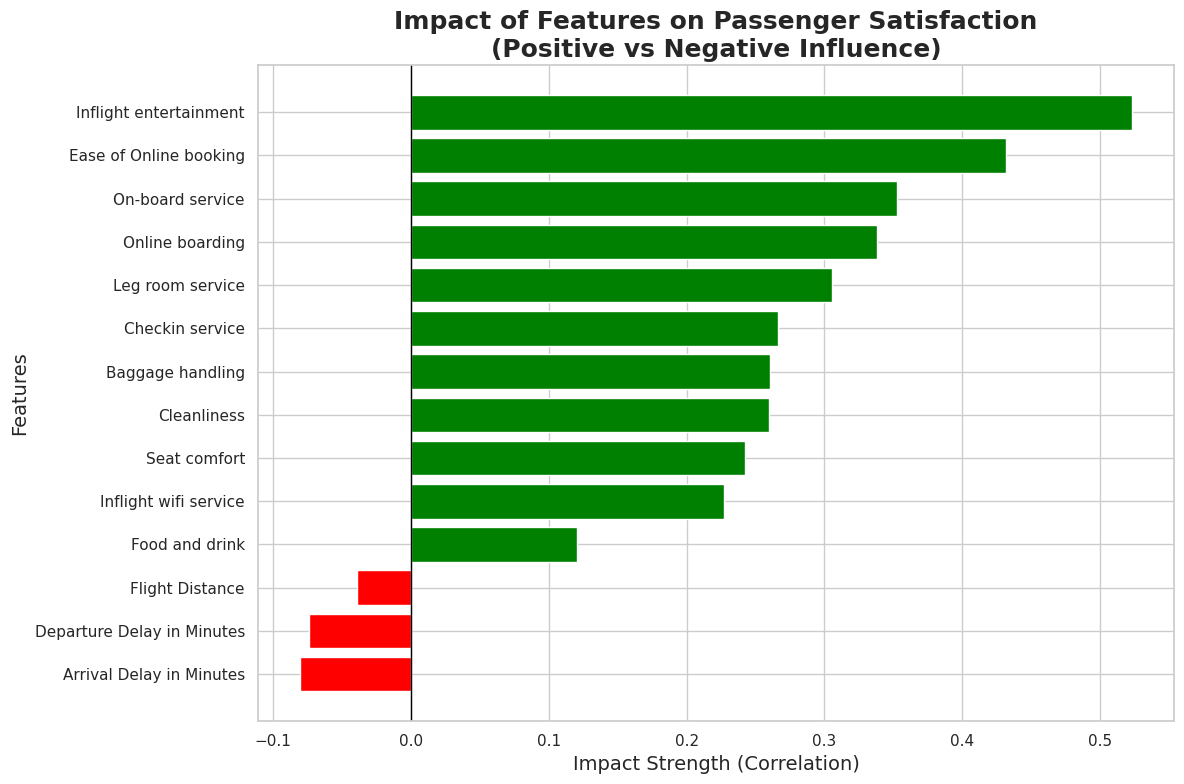

In [ ]:
df_impact = df.copy()

df_impact['Satisfaction_num'] = df_impact['Satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})
impact_features = [
    'Seat comfort', 'Inflight entertainment', 'Cleanliness',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Online boarding', 'Inflight wifi service',
    'Ease of Online booking', 'Food and drink',
    'Flight Distance',
    'Departure Delay in Minutes', 'Arrival Delay in Minutes'
]
impact_values = (
    df_impact[impact_features + ['Satisfaction_num']]
    .corr()['Satisfaction_num']
    .drop('Satisfaction_num')
    .sort_values()
)
plt.figure(figsize=(12,8))

colors = impact_values.apply(lambda x: 'green' if x > 0 else 'red')

plt.barh(
    impact_values.index,
    impact_values.values,
    color=colors
)

plt.axvline(0, color='black', linewidth=1)

plt.title(
    'Impact of Features on Passenger Satisfaction\n'
    '(Positive vs Negative Influence)',
    fontsize=18,
    fontweight='bold'
)

plt.xlabel('Impact Strength (Correlation)', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# Compare correlation vs SHAP side-by-side
comparison = pd.DataFrame({
    'Correlation': impact_values,
    'Mean_SHAP': mean_shap
})

comparison


,Correlation,Mean_SHAP
Arrival Delay in Minutes,-0.080691,-0.006013
Baggage handling,0.260398,0.078196
Checkin service,0.266089,0.062788
Cleanliness,0.259504,0.033935
Departure Delay in Minutes,-0.073960,0.004110
Ease of Online booking,0.432017,0.028546
Flight Distance,-0.039133,0.020873
Food and drink,0.120568,0.046650
Inflight entertainment,0.523364,0.113905
Inflight wifi service,0.227010,-0.001652


# **FINAL CONCLUSION**

This study analyzed the Airline Passenger Satisfaction dataset using Exploratory Data Analysis (EDA) and machine learning explainability (SHAP) to identify the most influential factors affecting passenger satisfaction. The EDA results showed that loyal customers, business travelers, and business-class passengers consistently report higher satisfaction due to better services, familiarity with airline systems, and access to premium benefits. Flight delays were found to have a strong negative impact on satisfaction, as dissatisfied passengers experienced longer and more variable delays.

Machine learning explainability further confirmed these findings. Features related to service quality had the strongest positive influence on satisfaction. In particular, Seat Comfort emerged as the most important predictor with the highest SHAP value, followed by Inflight Entertainment, Online Boarding, Food and Drink, and Leg Room Service. Operational features such as Arrival and Departure Delays showed negative correlations, confirming that delays reduce passenger satisfaction.

Overall, the combined EDA and ML results clearly indicate that passenger experience matters more than demographics. To improve satisfaction, airlines should prioritize comfort, entertainment, digital services, and punctuality. Investing in these areas will not only increase customer satisfaction but also strengthen loyalty and long-term customer retention.